<a href="https://colab.research.google.com/github/GuruPatel45/HexSoftware_Image_Classification_Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks', 'Image_Classification_Project']

In [ ]:
project_path = '/content/drive/MyDrive/Image_Classification_Project'
os.listdir(project_path)


['dataset', 'cat_dog_model.keras']

In [ ]:
dataset_path = project_path + '/dataset'
os.listdir(dataset_path)


['train', 'test']

In [ ]:
len(os.listdir(dataset_path + '/train/cat')),
len(os.listdir(dataset_path + '/train/dog'))


1001

In [ ]:
from PIL import Image
import os

def remove_corrupted_images(folder_path):
    removed = 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()   # check image
        except:
            os.remove(img_path)
            removed += 1
    return removed


In [ ]:
train_cat = '/content/drive/MyDrive/Image_Classification_Project/dataset/train/cat'
train_dog = '/content/drive/MyDrive/Image_Classification_Project/dataset/train/dog'

test_cat = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/cat'
test_dog = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog'

print("Removed from train/cat:", remove_corrupted_images(train_cat))
print("Removed from train/dog:", remove_corrupted_images(train_dog))
print("Removed from test/cat:", remove_corrupted_images(test_cat))
print("Removed from test/dog:", remove_corrupted_images(test_dog))


Removed from train/cat: 0
Removed from train/dog: 0
Removed from test/cat: 0
Removed from test/dog: 0


In [ ]:
print("Train Cat:", len(os.listdir(train_cat)))
print("Train Dog:", len(os.listdir(train_dog)))
print("Test Cat:", len(os.listdir(test_cat)))
print("Test Dog:", len(os.listdir(test_dog)))


Train Cat: 1000
Train Dog: 1001
Test Cat: 1000
Test Dog: 1001


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [ ]:
train_dir = '/content/drive/MyDrive/Image_Classification_Project/dataset/train'
test_dir  = '/content/drive/MyDrive/Image_Classification_Project/dataset/test'



In [ ]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2001 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # pretrained weights lock


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.8482 - loss: 0.3676 - val_accuracy: 0.9655 - val_loss: 0.1049
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.9637 - loss: 0.1032 - val_accuracy: 0.9750 - val_loss: 0.0716
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.9796 - loss: 0.0621 - val_accuracy: 0.9835 - val_loss: 0.0602
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9835 - loss: 0.0551 - val_accuracy: 0.9865 - val_loss: 0.0468
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.9900 - loss: 0.0413 - val_accuracy: 0.9880 - val_loss: 0.0460


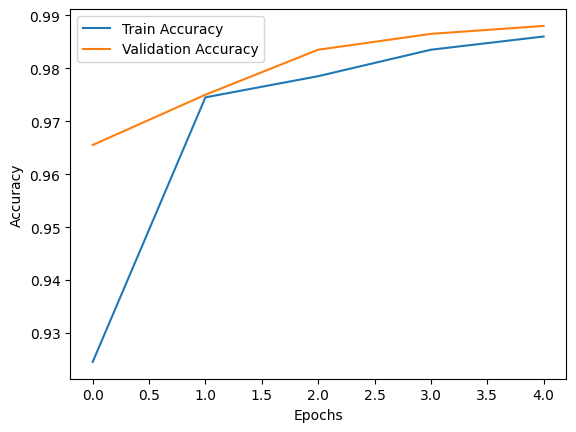

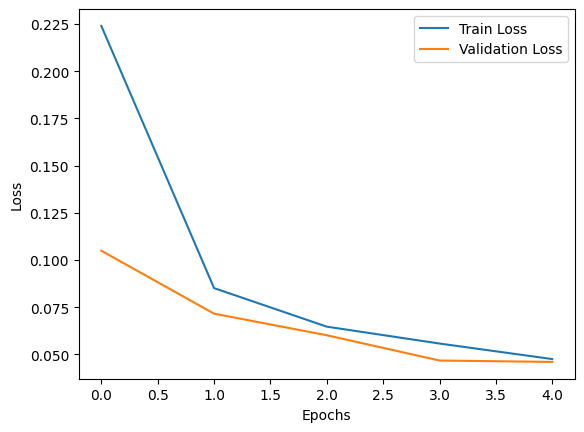

In [16]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [117]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/221.jpg'


In [118]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Dog 🐶


In [119]:
model.save('/content/drive/MyDrive/Image_Classification_Project/cat_dog_model.keras')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

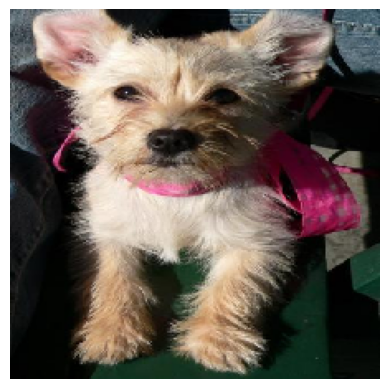

In [120]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')


In [124]:
# ====== ALL-IN-ONE SAFE CELL ======
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# image
img_path = "/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/221.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# base model & layer
base_model = model.get_layer("mobilenetv2_1.00_224")
gap_layer = model.layers[-2]     # GlobalAveragePooling2D
classifier = model.layers[-1]    # Dense

# Grad-CAM
with tf.GradientTape() as tape:
    # Forward pass through backbone
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    # Forward pass through classifier head
    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]

print("Grad-CAM computed successfully ✅")

Grad-CAM computed successfully ✅


In [125]:
# ===== GRAD-CAM HEATMAP GENERATION =====

with tf.GradientTape() as tape:
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)

pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap) + 1e-8

print("Heatmap created ✅")


Heatmap created ✅


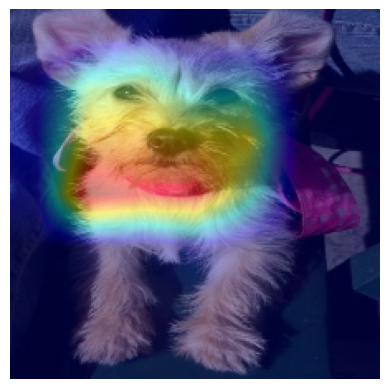

In [126]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# convert heatmap to numpy if needed
if hasattr(heatmap, "numpy"):
    heatmap_vis = heatmap.numpy()
else:
    heatmap_vis = heatmap

heatmap_vis = cv2.resize(heatmap_vis, (224,224))
heatmap_vis = np.uint8(255 * heatmap_vis)
heatmap_color = cv2.applyColorMap(heatmap_vis, cv2.COLORMAP_JET)

original = cv2.imread(img_path)
original = cv2.resize(original, (224,224))

overlay = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [127]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

In [128]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Image_Classification_Project/cat_dog_model.keras"
)


In [129]:
# Backbone (MobileNetV2)
base_model = model.layers[0]   # mobilenetv2_1.00_224

# Classifier head
gap_layer = model.layers[1]
classifier = model.layers[2]

# Last conv layer
last_conv_layer = base_model.get_layer("Conv_1")


In [130]:
def run_gradcam(img_path, img_size=(224,224)):

    # ---------- Load image ----------
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0   # same as training

    # ---------- Forward + Gradients ----------
    with tf.GradientTape() as tape:
        conv_outputs = base_model(img_array, training=False)
        tape.watch(conv_outputs)

        pooled = gap_layer(conv_outputs)
        preds = classifier(pooled)
        prob = preds[0][0]

        if prob > 0.5:
            # Dog image → Dog Grad-CAM
            loss = preds[:, 0]
            class_name = "Dog"
            confidence = prob * 100
        else:
            # Cat image → Cat Grad-CAM
            loss = 1 - preds[:, 0]
            class_name = "Cat"
            confidence = (1 - prob) * 100


    # ---------- Gradients ----------
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    # ---------- Grad-CAM heatmap ----------
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    heatmap = heatmap.numpy()

    # ---------- Resize heatmap ----------
    heatmap_resized = cv2.resize(heatmap, img_size)

    # ---------- Grayscale Grad-CAM ----------
    heap_map = np.uint8(255 * heatmap_resized)

    # ---------- Colored Heatmap ----------
    heat_map_color = cv2.applyColorMap(heap_map, cv2.COLORMAP_JET)

    # ---------- Original image ----------
    original = cv2.imread(img_path)
    original = cv2.resize(original, img_size)

    # ---------- Overlays ----------
    overlay_gray = cv2.addWeighted(
        cv2.cvtColor(original, cv2.COLOR_BGR2GRAY),
        0.6,
        heap_map,
        0.4,
        0
    )

    overlay_color = cv2.addWeighted(
        original,
        0.6,
        heat_map_color,
        0.4,
        0
    )

    # ---------- Prediction label ----------
    prob = preds[0][0].numpy()
    if prob > 0.5:
        label = "Dog"
        confidence = prob * 100
    else:
        label = "Cat"
        confidence = (1 - prob) * 100

    # ---------- Visualization ----------
    plt.figure(figsize=(16,8))

    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2,3,2)
    plt.imshow(heap_map, cmap="gray")
    plt.title("Grad-CAM (Grayscale)")
    plt.axis("off")

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(heat_map_color, cv2.COLOR_BGR2RGB))
    plt.title("Heat Map (Colored Grad-CAM)")
    plt.axis("off")

    plt.subplot(2,3,5)
    plt.imshow(overlay_gray, cmap="gray")
    plt.title("Image + Grayscale Grad-CAM")
    plt.axis("off")

    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(overlay_color, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heat Map Overlay")
    plt.axis("off")

    plt.suptitle(
        f"Prediction: {label} | Confidence: {confidence:.2f}%",
        fontsize=14,
        fontweight="bold"
    )

    plt.tight_layout()
    plt.show()


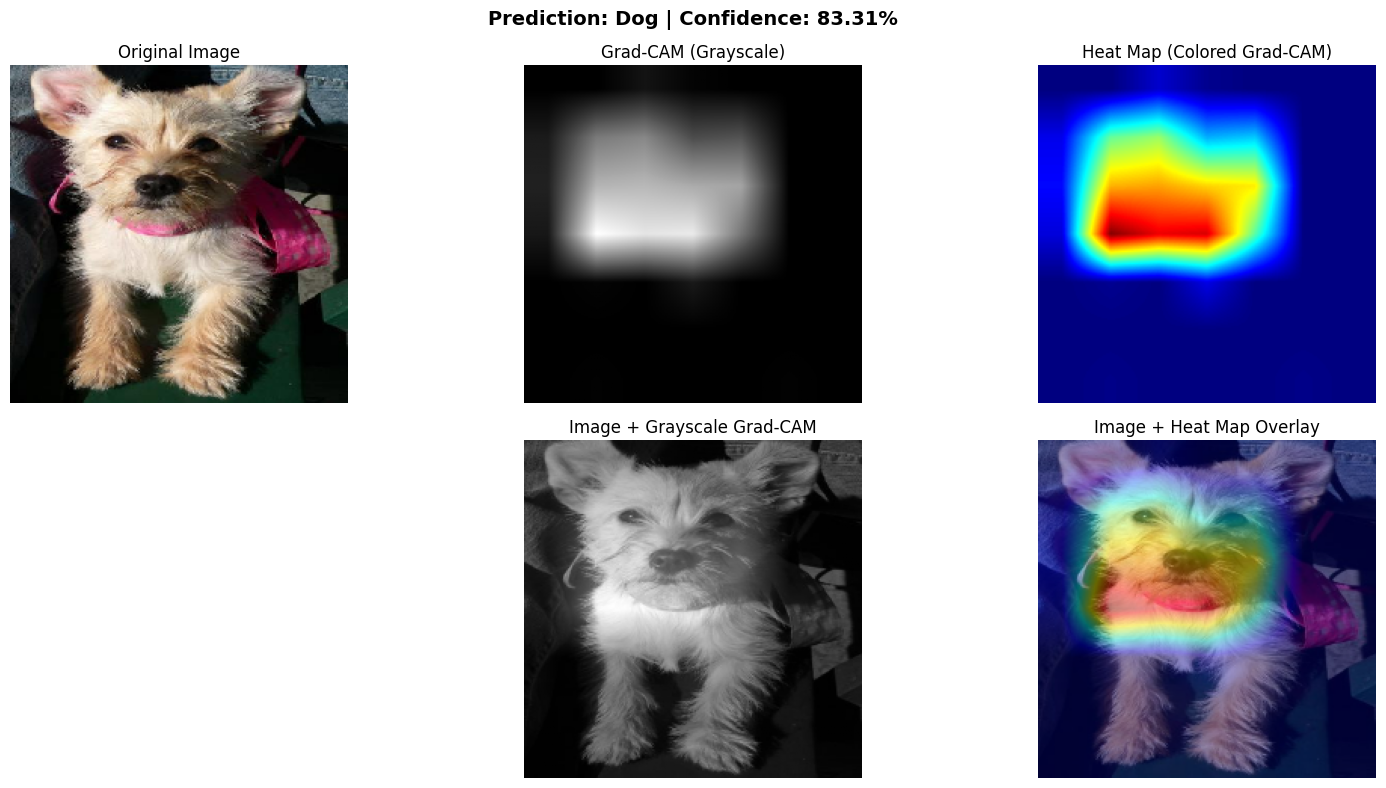

In [132]:
run_gradcam(
    "/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/221.jpg"
)
